# Packages

In [1]:
#!pip install plotnine

In [2]:
#!pip uninstall numpy scipy -y
#!pip install numpy scipy

In [3]:
#!pip install --upgrade numpy scipy matplotlib seaborn

In [4]:
#!pip install --upgrade pandas matplotlib seaborn

In [5]:
#!pip uninstall seaborn -y
#!pip install seaborn

In [6]:
#!pip install seaborn==0.11.1

# Code

In [1]:
import s3fs
import pandas as pd
from dateutil.parser import parse
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import re

/home/ec2-user/anaconda3/envs/python3/lib/python3.10/site-packages/pandas/core/computation/expressions.py:21: UserWarning: Pandas requires version '2.8.0' or newer of 'numexpr' (version '2.7.3' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED


In [2]:
# Create an S3 filesystem instance
s3 = s3fs.S3FileSystem()

# Specify the path to the CSV file in the S3 bucket
s3_path = 's3://group-mcm-rplace/sample_df (2).csv'

# Read the CSV file into a pandas DataFrame
df = pd.read_csv(s3.open(s3_path))
df.head()

,Unnamed: 0,timestamp,user,coordinate,pixel_color
0,0,2023-07-20 13:00:26.088000+00:00,no+8HEIDjbdx7/LxH9Xr+h4lyoar0MRTYugWKrGdQOg7dF...,"-199,-235",#FFFFFF
1,1,2023-07-20 13:04:46.627000+00:00,YF56mQAiwsAJZWzgMKsdbV9/C/BX6TrYCG5tI0RWei5gMB...,"-282,136",#FF4500
2,2,2023-07-20 13:04:50.488000+00:00,JVohwv9S68P/w6g43UGQ2cIYfQRDbHGz6j+e4as892QiRb...,"4,311",#000000
3,3,2023-07-20 13:04:53.186000+00:00,ZSFZbF0lkStMHMvpxTc9g1+JpjHXDHBQVdFn8wo+9gGCyX...,"231,7",#000000
4,4,2023-07-20 13:04:55.302000+00:00,jgIOrksmd9jjetEZzqaU6mmKrIJwng/c/NHdZKvtqNZZ1A...,"-492,-498",#000000


In [3]:
can = df.iloc[:, 3:5]
can.head()

,coordinate,pixel_color
0,"-199,-235",#FFFFFF
1,"-282,136",#FF4500
2,"4,311",#000000
3,"231,7",#000000
4,"-492,-498",#000000


# Top 3

In [3]:
top3_users = [
    'kN91vAk/cntIE4qOgH6b06ZWInymLuAez37ZA5gv+WfT8CCewv+MDGk1WrI8+25uM+UN1TvXBj+Tl5uQoNvZ7g==',
    'oCgWHk6Cfsa52vAOJBPqBDyKN+OH3Obx0/bXBShVJD/ADN371LAMW/oqwegoh7Hec1psCxzg39QbtRKnL4M3NA==',
    '/YNNvIErSA5atGXTER7fymCxIY/9xvunlE0Kisx+Cbppoi6szjAkwAeHn2cSLimDx6c8/W/4YKYoSr0fKZXBFw=='
]

In [12]:
# Adjusted function to extract x and y values
def parse_coordinates(coord_str):
    if re.match(r"^\{X:\s*\d+,\s*Y:\s*-\d+,\s*R:\s*\d+\}$", coord_str):  # Moderation Circles
        x = int(re.search(r"X:\s*(-?\d+)", coord_str).group(1))
        y = int(re.search(r"Y:\s*(-?\d+)", coord_str).group(1))
        return x, y  # Return center of the circle
    elif re.match(r"^\d+,-?\d+,\d+,-?\d+$", coord_str):  # Moderation Rectangles
        x1, y1, _, _ = map(int, coord_str.split(','))
        return x1, y1  # Return upper left corner of the rectangle
    elif re.match(r"^\d+,-?\d+$", coord_str):  # Simple Coordinates
        return tuple(map(int, coord_str.split(',')))
    else:
        return None, None  # Unrecognized format

In [5]:
top3_users = [
    'kN91vAk/cntIE4qOgH6b06ZWInymLuAez37ZA5gv+WfT8CCewv+MDGk1WrI8+25uM+UN1TvXBj+Tl5uQoNvZ7g==',
    'oCgWHk6Cfsa52vAOJBPqBDyKN+OH3Obx0/bXBShVJD/ADN371LAMW/oqwegoh7Hec1psCxzg39QbtRKnL4M3NA==',
    '/YNNvIErSA5atGXTER7fymCxIY/9xvunlE0Kisx+Cbppoi6szjAkwAeHn2cSLimDx6c8/W/4YKYoSr0fKZXBFw=='
]

# Filter the DataFrame
top3 = df[df['user'].isin(top3_users)]
top3.head()

,Unnamed: 0,timestamp,user,coordinate,pixel_color
150344,150344,2023-07-20 20:02:18.495000+00:00,/YNNvIErSA5atGXTER7fymCxIY/9xvunlE0Kisx+Cbppoi...,"-361,477",#FF4500
161226,161226,2023-07-20 20:24:09.331000+00:00,oCgWHk6Cfsa52vAOJBPqBDyKN+OH3Obx0/bXBShVJD/ADN...,"281,-369",#FFD635
170307,170307,2023-07-20 20:44:51.464000+00:00,oCgWHk6Cfsa52vAOJBPqBDyKN+OH3Obx0/bXBShVJD/ADN...,"278,-367",#FFD635
172860,172860,2023-07-20 20:50:17.479000+00:00,/YNNvIErSA5atGXTER7fymCxIY/9xvunlE0Kisx+Cbppoi...,"467,401",#FFA800
174610,174610,2023-07-20 20:54:08.807000+00:00,oCgWHk6Cfsa52vAOJBPqBDyKN+OH3Obx0/bXBShVJD/ADN...,"327,382",#FFD635


In [6]:
top_3 = top3.copy()
top_3[['x', 'y']] = top_3.apply(lambda row: pd.Series(parse_coordinates(row['coordinate'])), axis=1)
top_3.head()

,Unnamed: 0,timestamp,user,coordinate,pixel_color,x,y
150344,150344,2023-07-20 20:02:18.495000+00:00,/YNNvIErSA5atGXTER7fymCxIY/9xvunlE0Kisx+Cbppoi...,"-361,477",#FF4500,NaN,NaN
161226,161226,2023-07-20 20:24:09.331000+00:00,oCgWHk6Cfsa52vAOJBPqBDyKN+OH3Obx0/bXBShVJD/ADN...,"281,-369",#FFD635,281.0,-369.0
170307,170307,2023-07-20 20:44:51.464000+00:00,oCgWHk6Cfsa52vAOJBPqBDyKN+OH3Obx0/bXBShVJD/ADN...,"278,-367",#FFD635,278.0,-367.0
172860,172860,2023-07-20 20:50:17.479000+00:00,/YNNvIErSA5atGXTER7fymCxIY/9xvunlE0Kisx+Cbppoi...,"467,401",#FFA800,467.0,401.0
174610,174610,2023-07-20 20:54:08.807000+00:00,oCgWHk6Cfsa52vAOJBPqBDyKN+OH3Obx0/bXBShVJD/ADN...,"327,382",#FFD635,327.0,382.0


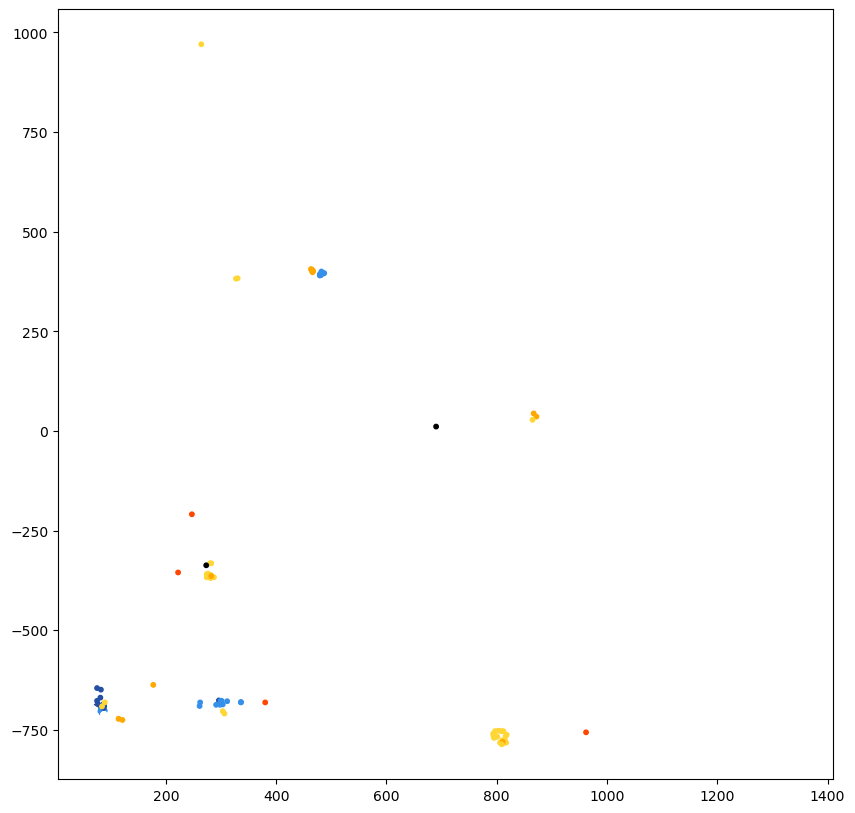

In [7]:
plt.figure(figsize=(10, 10))
plt.scatter(top_3['x'], top_3['y'], c=top3['pixel_color'], s=10)  # Adjust dot size as needed

# Set the axes limits if required, or use plt.autoscale()
plt.autoscale(enable=True, axis='both', tight=None)

plt.show()

# All users

In [4]:
# Regular expression patterns
pattern_int_int = r'^(-?\d+),(-?\d+)$'
pattern_int_int_int_int = r'^(-?\d+),(-?\d+),(-?\d+),(-?\d+)$'
pattern_X_Y_R = r'{X: (-?\d+), Y: (-?\d+), R: (\d+)}'

def clean_coordinate(coord):
    if re.match(pattern_int_int, coord):
        return coord
    elif re.match(pattern_int_int_int_int, coord):
        x, y, _, _ = coord.split(',')
        return f"{x},{y}"
    elif re.match(pattern_X_Y_R, coord):
        x, y, _ = re.findall(r'-?\d+', coord)
        return f"{x},{y}"
    else:
        return None

In [5]:
can['coordinate'] = can['coordinate'].apply(clean_coordinate)

In [6]:
can = can.dropna(subset=['coordinate'])
can.head()

,coordinate,pixel_color
0,"-199,-235",#FFFFFF
1,"-282,136",#FF4500
2,"4,311",#000000
3,"231,7",#000000
4,"-492,-498",#000000


In [7]:
can[['x', 'y']] = can['coordinate'].str.split(',', expand=True).astype(int)
can.head()

,coordinate,pixel_color,x,y
0,"-199,-235",#FFFFFF,-199,-235
1,"-282,136",#FF4500,-282,136
2,"4,311",#000000,4,311
3,"231,7",#000000,231,7
4,"-492,-498",#000000,-492,-498


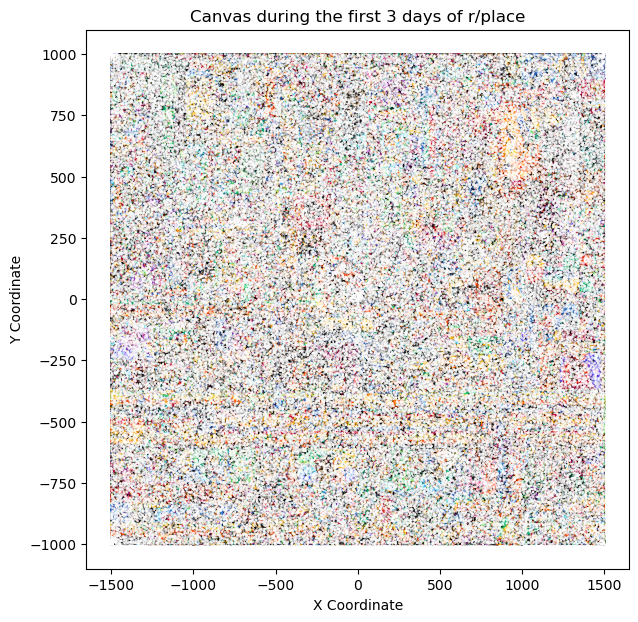

In [11]:
# Plot
plt.figure(figsize=(10, 10))
# for index, row in df_first_3_days.iterrows():
#     plt.scatter(row['x'], row['y'], color=row['pixel_color'], label=row['user'])

plt.scatter(can['x'], can['y'], c=can['pixel_color'], s=10)  # Adjust dot size as needed
plt.title("Canvas during the first 3 days of r/place")
plt.xlabel('X Coordinate')
plt.ylabel('Y Coordinate')
plt.show()

# Play

In [ ]:
can2 = can[can['user'